# Moments

nth moment:
$$
E[x^n] = \int p(x) x^n dx
$$

## Moment Generating Function (MGF)

MGF is a function that encodes all the positive integer moments of a distribution at once, provided it exists. It is defined as:
    
$$
\text{mgf}(t) = \int e^{tx} p(x) dx
$$

To see why this encodes all the moments, take eg the first derivative of the above equation with respect to t. This gives:

$$
\frac{d}{dt} \int p(x) e^{tx} \text{dx} = \int p(x)*e^{tx}*x*\text{dx}
$$

at t = 0, the above becomes:

$$\int p(x)x * \text{dx}$$

which is mean. If you the k derivatives of the mgf, you get kth moment back. This is how the mgf "encodes" moments. For instance 2nd derivate:

$$
\frac{d}{dt} \int p(x)*x*e^{tx}\text{dx} = \int p(x) * x * e^{tx} * x * \text{dx} \\
\int p(x) x^2 e^{tx} \text{dx}
$$

evaluated at t = 0, the above becomes $\int p(x) x^2 \text{dx}$ -- variance.

## Skewness and Kurtosis

### As Polynomial Functions

Below analysis is inspired by the reddit discussion [ELI5: What are Moments, Skewness and Kurtosis in Statistics? ;-;](https://www.reddit.com/r/explainlikeimfive/comments/610nc0/eli5_what_are_moments_skewness_and_kurtosis_in/dfawfxt?utm_source=share&utm_medium=web2x&context=3).

In [121]:
import pandas as pd
import scipy.stats
hfi = pd.read_csv('data/edhec/edhec-hedgefundindices.csv', header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')

In [5]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [116]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

plt.rcParams["figure.figsize"] = (6,8)


def hedge_fund_moments(hedge_fund):
    dist_moments(hfi[hedge_fund])

def dist_moments(x):
    sigma = x.std(ddof=0)
    m1 = (x - x.mean())
    m2 = m1**2
    m3 = m1**3
    m4 = m1**4

    fig = plt.figure()
    
    ax = plt.subplot(5,1,1)
    plt.title('Distribution')
    ax.hist(x)
    
    ax = plt.subplot(5,1,2)
    plt.title('Mean')
    ax.scatter(x, m1, alpha=.1)

    ax = plt.subplot(5,1,3)
    plt.title('Variance')
    ax.scatter(x, m2, alpha=.1)
    
    ax = plt.subplot(5,1,4)
    plt.title(f'Skewness {round((m1**3).mean()/sigma**3,2)}')
    ax.scatter(x, m3, alpha=.1)

    ax = plt.subplot(5,1,5)
    plt.title(f'Kurtosis {round((m1**4).mean()/sigma**4,2)}')
    ax.scatter(x, m4, alpha=.1)
    
    fig.tight_layout()
    
    plt.show()

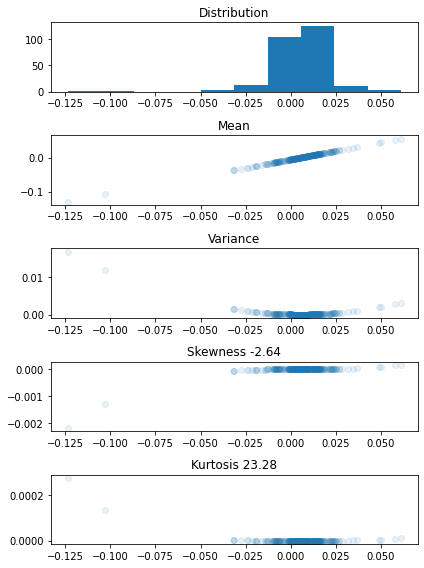

In [117]:
hedge_fund_moments('Convertible Arbitrage')

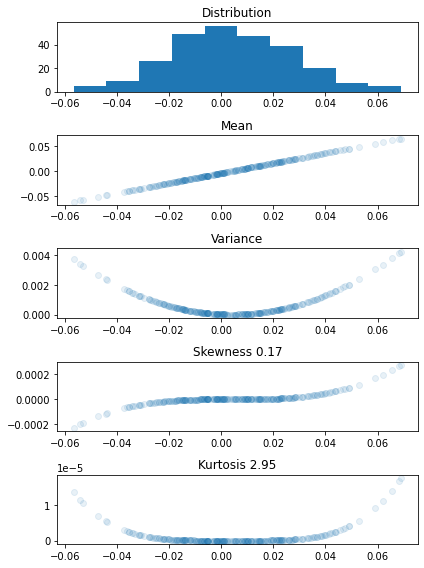

In [118]:
hedge_fund_moments('CTA Global')

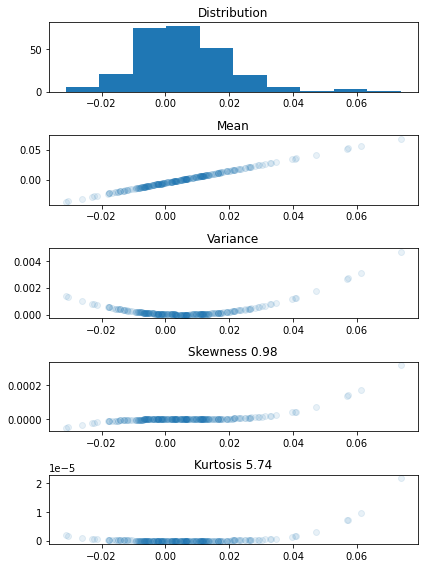

In [119]:
hedge_fund_moments('Global Macro')

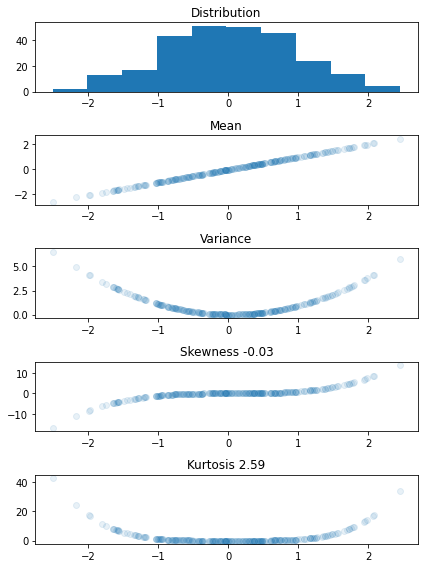

In [120]:
normal_rets = np.random.normal(0, 1, size=(263,))
dist_moments(normal_rets)